In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [3]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [35]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
#Create counters for the record numbers, 1–50; and the set counter.
city_data = []

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

1.3998626821806681 84.76326123255092
33.16843779912668 -38.08634847389001
-73.24195697378765 -134.66272628441303
57.36480046745686 33.53181555211006
-4.11768419206382 62.54208793910465
-19.624075398761022 109.79460025695136
37.628053787885875 -141.68450517474838
-49.502298493735786 151.1812235755272
77.13006401065513 95.9650549421205
57.173256824265934 -176.50068027328575
-66.74940153065972 112.96237357626637
29.926346616368235 158.84835984179722
88.36661693056067 -135.07119438781234
-88.97981622798491 25.114373973927485
1.928420407821278 -29.39107456882377
76.06854383710882 38.25201911436125
-54.09135327788034 176.79446917320882
-85.54959006222116 -174.99231692709265
-38.668894340514214 -134.24707400875212
80.30947230001783 124.10659754728937
0.6277773540537623 115.30231367598242
-76.27845606735465 -151.39076119839896
82.46740440870528 118.39957602945879
-67.42673923845848 160.79581592450154
9.115739343977125 17.876748949750294
-11.61752458230714 -145.93516333707308
-79.54131704681072

11.859278634745152 25.420123102378483
-45.06525475766417 -60.12093437485774
-13.589400743656597 45.74603944856443
-71.72514781322437 74.81414164896367
89.28376217175824 -167.9187542470316
-12.603552487019542 -149.51143429008874
31.480107744818582 -21.482223048051623
62.77919314141366 -8.902475349531471
43.13870426090537 89.34556527643406
88.31501967441193 174.44838615873897
-17.40525889805822 105.95294171486586
76.65545417652444 56.746432628470984
7.372686163130794 -1.5686211311875695
6.377638564799582 -46.87234665093786
-44.57179886936317 62.47153811184964
-19.274788648224032 -127.4600001382345
6.466315240593119 -144.3653012636899
-37.97722195757521 73.31978704963728
-20.18686039793573 -4.948799489713906
3.2665366510171907 -91.12351889306004
75.81782825166815 139.44471833240192
50.2707365011772 -66.56102133645665
82.70669052479639 146.4680343863787
53.96222431557649 -26.540752585073704
24.606873389324903 -147.80107776087095
-65.63276338098775 15.39149601202692
-2.1571357029016127 20.5

In [9]:
from citipy import citipy

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hambantota
Processing Record 2 of Set 1 | ribeira grande
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | firovo
Processing Record 5 of Set 1 | victoria
Processing Record 6 of Set 1 | carnarvon
Processing Record 7 of Set 1 | fortuna
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | khatanga
Processing Record 10 of Set 1 | provideniya
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 13 of Set 1 | tuktoyaktuk
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | touros
Processing Record 16 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 17 of Set 1 | dunedin
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | loa janan
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 

Processing Record 40 of Set 4 | caravelas
Processing Record 41 of Set 4 | inderborskiy
City not found. Skipping...
Processing Record 42 of Set 4 | zhezkazgan
Processing Record 43 of Set 4 | leninsk
Processing Record 44 of Set 4 | longyearbyen
Processing Record 45 of Set 4 | vila velha
Processing Record 46 of Set 4 | kajaani
Processing Record 47 of Set 4 | kahului
Processing Record 48 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 49 of Set 4 | gobabis
Processing Record 50 of Set 4 | pisco
Processing Record 1 of Set 5 | le vauclin
Processing Record 2 of Set 5 | chegdomyn
Processing Record 3 of Set 5 | aketi
Processing Record 4 of Set 5 | havre-saint-pierre
Processing Record 5 of Set 5 | ancud
Processing Record 6 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 7 of Set 5 | port elizabeth
Processing Record 8 of Set 5 | jamestown
Processing Record 9 of Set 5 | bredy
Processing Record 10 of Set 5 | talaya
Processing Record 11 of Set 5 | 

Processing Record 27 of Set 8 | dudinka
Processing Record 28 of Set 8 | linhares
Processing Record 29 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 30 of Set 8 | saharanpur
Processing Record 31 of Set 8 | kidal
Processing Record 32 of Set 8 | saint-marc
Processing Record 33 of Set 8 | dikson
Processing Record 34 of Set 8 | lavrentiya
Processing Record 35 of Set 8 | chifeng
Processing Record 36 of Set 8 | nushki
Processing Record 37 of Set 8 | nome
Processing Record 38 of Set 8 | kautokeino
Processing Record 39 of Set 8 | nizhneudinsk
Processing Record 40 of Set 8 | hoquiam
Processing Record 41 of Set 8 | cayenne
Processing Record 42 of Set 8 | kingman
Processing Record 43 of Set 8 | mahadday weyne
City not found. Skipping...
Processing Record 44 of Set 8 | casambalangan
Processing Record 45 of Set 8 | atar
Processing Record 46 of Set 8 | geri
Processing Record 47 of Set 8 | grand forks
Processing Record 48 of Set 8 | fort nelson
Processing Record 49 of Set 8 | no

Processing Record 16 of Set 12 | dentsville
Processing Record 17 of Set 12 | praia da vitoria
Processing Record 18 of Set 12 | khuzhir
Processing Record 19 of Set 12 | japura
Processing Record 20 of Set 12 | kota belud
Processing Record 21 of Set 12 | vostryakovo
Processing Record 22 of Set 12 | mazamari
Processing Record 23 of Set 12 | batemans bay
Processing Record 24 of Set 12 | tongliao
Processing Record 25 of Set 12 | ambon
Processing Record 26 of Set 12 | marsa matruh
Processing Record 27 of Set 12 | nyurba
Processing Record 28 of Set 12 | saldanha
Processing Record 29 of Set 12 | whyalla
Processing Record 30 of Set 12 | jacareacanga
Processing Record 31 of Set 12 | sitka
Processing Record 32 of Set 12 | aquiraz
Processing Record 33 of Set 12 | lamont
Processing Record 34 of Set 12 | bonthe
Processing Record 35 of Set 12 | antofagasta
Processing Record 36 of Set 12 | cabo rojo
Processing Record 37 of Set 12 | guthrie
Processing Record 38 of Set 12 | vallenar
Processing Record 39 

In [22]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hambantota,6.1241,81.1185,79.32,87,100,11.10,LK,2022-07-19 14:18:25
1,Ribeira Grande,38.5167,-28.7000,73.80,94,75,6.91,PT,2022-07-19 14:18:19
2,Rikitea,-23.1203,-134.9692,73.90,71,3,9.53,PF,2022-07-19 14:23:27
3,Firovo,57.4814,33.7021,66.18,48,100,7.14,RU,2022-07-19 14:21:10
4,Victoria,22.2855,114.1577,87.85,78,100,10.00,HK,2022-07-19 14:25:25
5,Carnarvon,-24.8667,113.6333,67.89,62,0,17.65,AU,2022-07-19 14:25:26
6,Fortuna,40.5982,-124.1573,53.65,91,44,1.90,US,2022-07-19 14:23:27
7,Hobart,-42.8794,147.3294,44.46,84,100,5.75,AU,2022-07-19 14:15:50
8,Khatanga,71.9667,102.5000,49.10,49,100,13.24,RU,2022-07-19 14:24:17
9,Provideniya,64.3833,-173.3000,41.09,56,100,5.23,RU,2022-07-19 14:12:18


In [33]:
# Reorder the columns in the order you want them to appear.
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp", "Humidity", "Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hambantota,LK,2022-07-19 14:18:25,6.1241,81.1185,79.32,87,100,11.10
1,Ribeira Grande,PT,2022-07-19 14:18:19,38.5167,-28.7000,73.80,94,75,6.91
2,Rikitea,PF,2022-07-19 14:23:27,-23.1203,-134.9692,73.90,71,3,9.53
3,Firovo,RU,2022-07-19 14:21:10,57.4814,33.7021,66.18,48,100,7.14
4,Victoria,HK,2022-07-19 14:25:25,22.2855,114.1577,87.85,78,100,10.00
5,Carnarvon,AU,2022-07-19 14:25:26,-24.8667,113.6333,67.89,62,0,17.65
6,Fortuna,US,2022-07-19 14:23:27,40.5982,-124.1573,53.65,91,44,1.90
7,Hobart,AU,2022-07-19 14:15:50,-42.8794,147.3294,44.46,84,100,5.75
8,Khatanga,RU,2022-07-19 14:24:17,71.9667,102.5000,49.10,49,100,13.24
9,Provideniya,RU,2022-07-19 14:12:18,64.3833,-173.3000,41.09,56,100,5.23


In [34]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [37]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

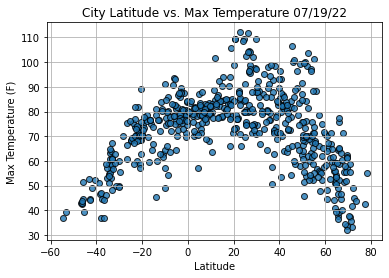

In [38]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


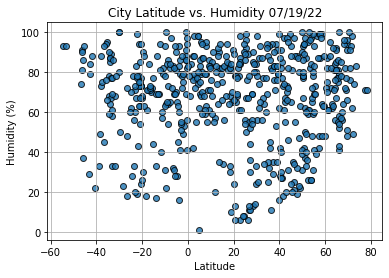

In [40]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

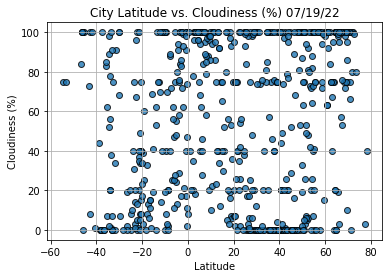

In [41]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()